# 1.数据处理

In [2]:
import pandas as pd
import os

In [3]:
user_level = pd.read_excel('user_level.xlsx')

In [4]:
excel_list = []
for item in os.listdir('./'):  #返回路径下的文件
    if 'xlsx' in item and 'user_level' not in item:
        excel_list.append(item)
excel_list

['1、系统认识数据分析.xlsx',
 '2、EXCEL基础操作.xlsx',
 '3、Tableau数据可视化.xlsx',
 '4、SQL从入门到实战.xlsx',
 '5、Python.xlsx']

In [5]:
danmu = pd.DataFrame()
for item in excel_list:
    excel = pd.read_excel(item,converters={'uid':str,'id':str})
    excel['视频标题'] = item  #数据来源于哪张表
    danmu = pd.concat([danmu,excel],axis=0)
danmu

,id,progress,content,ctime,uid,视频标题
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析.xlsx
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析.xlsx
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析.xlsx
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883,1、系统认识数据分析.xlsx
4,53811230195500032,68093,大制作,1629727976,8879111121911466217,1、系统认识数据分析.xlsx
...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx
1250,1212573101313764864,4412898,5,1671641177,-4078686192199890078,5、Python.xlsx
1251,1214583153063240704,4407770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx
1252,1214583220188773888,4414000,5,1671880802,6689174160540423840,5、Python.xlsx


# 2.时间

## 2.1 时间处理

In [6]:
from datetime import datetime

In [7]:
danmu['弹幕创建时间'] = danmu['ctime'].map(datetime.fromtimestamp)
danmu['弹幕创建时间']

0      2021-08-22 22:43:22
1      2021-08-23 07:27:06
2      2021-08-23 07:27:30
3      2021-08-23 09:56:52
4      2021-08-23 22:12:56
               ...        
1249   2022-12-22 00:46:10
1250   2022-12-22 00:46:17
1251   2022-12-24 19:19:54
1252   2022-12-24 19:20:02
1253   2022-12-31 19:42:05
Name: 弹幕创建时间, Length: 28016, dtype: datetime64[ns]

In [8]:
danmu['年'] = danmu['弹幕创建时间'].map(lambda x:x.year)
danmu['月份'] = danmu['弹幕创建时间'].map(lambda x:x.month)
danmu['星期'] = danmu['弹幕创建时间'].map(datetime.isoweekday)
danmu['小时'] = danmu['弹幕创建时间'].map(lambda x: x.hour)
danmu

,id,progress,content,ctime,uid,视频标题,弹幕创建时间,年,月份,星期,小时
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析.xlsx,2021-08-22 22:43:22,2021,8,7,22
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:06,2021,8,1,7
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:30,2021,8,1,7
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883,1、系统认识数据分析.xlsx,2021-08-23 09:56:52,2021,8,1,9
4,53811230195500032,68093,大制作,1629727976,8879111121911466217,1、系统认识数据分析.xlsx,2021-08-23 22:12:56,2021,8,1,22
...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:10,2022,12,4,0
1250,1212573101313764864,4412898,5,1671641177,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:17,2022,12,4,0
1251,1214583153063240704,4407770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx,2022-12-24 19:19:54,2022,12,6,19
1252,1214583220188773888,4414000,5,1671880802,6689174160540423840,5、Python.xlsx,2022-12-24 19:20:02,2022,12,6,19


## 2.2 时间分析

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

把22年的弹幕选出来

In [10]:
danmu_year = danmu[danmu['年']==2022]
danmu_year

,id,progress,content,ctime,uid,视频标题,弹幕创建时间,年,月份,星期,小时
119,955256697446334464,193596,26个人,1640966672,8925482694608335642,1、系统认识数据分析.xlsx,2022-01-01 00:04:32,2022,1,6,0
120,955258091952824320,333566,新年快乐,1640966838,8925482694608335642,1、系统认识数据分析.xlsx,2022-01-01 00:07:18,2022,1,6,0
121,957326648055242752,318384,语速正好,1641213429,3105945468129837519,1、系统认识数据分析.xlsx,2022-01-03 20:37:09,2022,1,1,20
122,958483048722579456,322386,课件PDF在哪,1641351283,-349731603797322061,1、系统认识数据分析.xlsx,2022-01-05 10:54:43,2022,1,3,10
123,958581356437020672,315713,楞,1641363002,-6327355589687884151,1、系统认识数据分析.xlsx,2022-01-05 14:10:02,2022,1,3,14
...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:10,2022,12,4,0
1250,1212573101313764864,4412898,5,1671641177,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:17,2022,12,4,0
1251,1214583153063240704,4407770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx,2022-12-24 19:19:54,2022,12,6,19
1252,1214583220188773888,4414000,5,1671880802,6689174160540423840,5、Python.xlsx,2022-12-24 19:20:02,2022,12,6,19


### 2.2.1 月份

<Axes: xlabel='月份'>

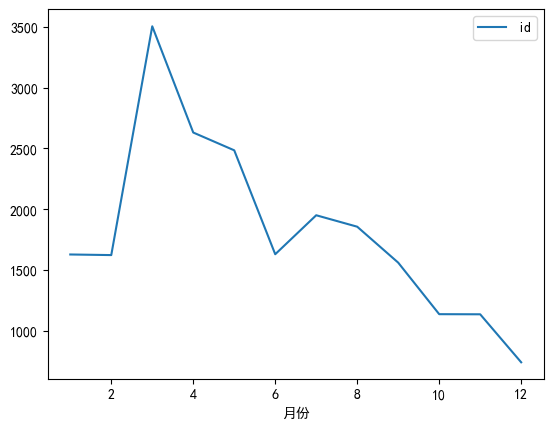

In [11]:
danmu_year.groupby('月份')[['id']].count().plot()

22年，3月份的弹幕非常活跃

<Axes: xlabel='月份'>

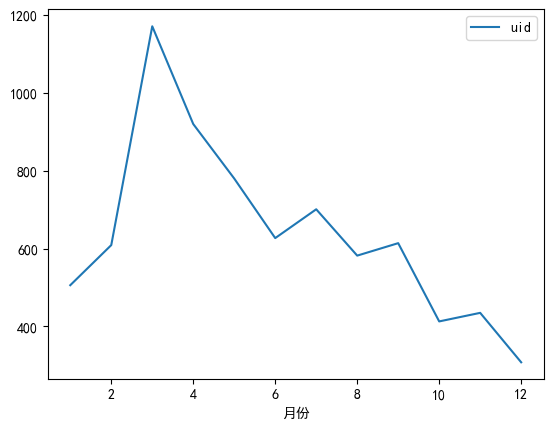

In [12]:
danmu_year.groupby('月份')[['uid']].nunique().plot()  #去重

22年，3月份，发弹幕的人也是最多的

假设1：季节？  
假设2：视频进入了推流池子？  

### 2.2.2 星期

<Axes: xlabel='星期'>

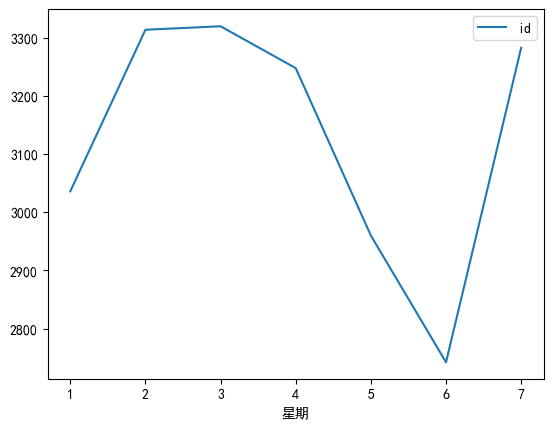

In [13]:
danmu_year.groupby('星期')[['id']].count().plot()

<Axes: xlabel='星期'>

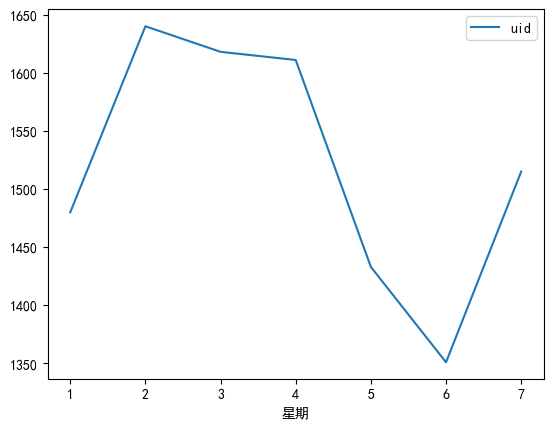

In [14]:
danmu_year.groupby('星期')[['uid']].nunique().plot()

惊奇的发现，工作日1~4，周天，弹幕是最活跃的；周五或者周六活跃度会下降

# 3.用户画像

In [15]:
danmu

,id,progress,content,ctime,uid,视频标题,弹幕创建时间,年,月份,星期,小时
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析.xlsx,2021-08-22 22:43:22,2021,8,7,22
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:06,2021,8,1,7
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:30,2021,8,1,7
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883,1、系统认识数据分析.xlsx,2021-08-23 09:56:52,2021,8,1,9
4,53811230195500032,68093,大制作,1629727976,8879111121911466217,1、系统认识数据分析.xlsx,2021-08-23 22:12:56,2021,8,1,22
...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:10,2022,12,4,0
1250,1212573101313764864,4412898,5,1671641177,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:17,2022,12,4,0
1251,1214583153063240704,4407770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx,2022-12-24 19:19:54,2022,12,6,19
1252,1214583220188773888,4414000,5,1671880802,6689174160540423840,5、Python.xlsx,2022-12-24 19:20:02,2022,12,6,19


## 3.1 用户处理

In [16]:
danmu['用户弹幕数'] = danmu.groupby('uid')['id'].transform('count')
danmu

,id,progress,content,ctime,uid,视频标题,弹幕创建时间,年,月份,星期,小时,用户弹幕数
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析.xlsx,2021-08-22 22:43:22,2021,8,7,22,2.0
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:06,2021,8,1,7,79.0
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:30,2021,8,1,7,79.0
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883,1、系统认识数据分析.xlsx,2021-08-23 09:56:52,2021,8,1,9,7.0
4,53811230195500032,68093,大制作,1629727976,8879111121911466217,1、系统认识数据分析.xlsx,2021-08-23 22:12:56,2021,8,1,22,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:10,2022,12,4,0,35.0
1250,1212573101313764864,4412898,5,1671641177,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:17,2022,12,4,0,35.0
1251,1214583153063240704,4407770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx,2022-12-24 19:19:54,2022,12,6,19,2.0
1252,1214583220188773888,4414000,5,1671880802,6689174160540423840,5、Python.xlsx,2022-12-24 19:20:02,2022,12,6,19,2.0


In [17]:
user_level['uid'] = user_level['uid'].astype(str)

In [18]:
danmu_level = pd.merge(danmu, user_level, on='uid', how='inner')
danmu_level

,id,progress,content,ctime,uid,视频标题,弹幕创建时间,年,月份,星期,小时,用户弹幕数,level
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析.xlsx,2021-08-22 22:43:22,2021,8,7,22,2.0,5
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:06,2021,8,1,7,79.0,0
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:30,2021,8,1,7,79.0,0
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883,1、系统认识数据分析.xlsx,2021-08-23 09:56:52,2021,8,1,9,7.0,6
4,53811230195500032,68093,大制作,1629727976,8879111121911466217,1、系统认识数据分析.xlsx,2021-08-23 22:12:56,2021,8,1,22,2.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27610,1212573043013250816,4404199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:10,2022,12,4,0,35.0,3
27611,1212573101313764864,4412898,5,1671641177,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:17,2022,12,4,0,35.0,3
27612,1214583153063240704,4407770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx,2022-12-24 19:19:54,2022,12,6,19,2.0,4
27613,1214583220188773888,4414000,5,1671880802,6689174160540423840,5、Python.xlsx,2022-12-24 19:20:02,2022,12,6,19,2.0,4


## 3.2 用户弹幕内容

In [19]:
danmu_level.groupby('uid')[['id']].count().sort_values('id',ascending=False)

,id
uid,
6653485828143602809,214
6812827409839048297,187
-3260951504495839240,176
7975574863793804658,130
-5461449000341941986,102
...,...
-8446399402889408388,1
-8445271993221121197,1
-8444651956084190909,1


In [20]:
pd.set_option('display.max_rows',300)  #指定datafram最大行数
danmu_level[danmu_level['uid']=='6653485828143602809']  #uid为字符串 要用引号括起来

,id,progress,content,ctime,uid,视频标题,弹幕创建时间,年,月份,星期,小时,用户弹幕数,level
2476,1117359445828237312,239856,因为原来已经有了一个名称相同的表格了，只不过被师兄隐藏了,1660290825,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 15:53:45,2022,8,5,15,214.0,6
2825,1117365973087926528,577767,我有，需要付费,1660291603,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 16:06:43,2022,8,5,16,214.0,6
2826,1117367556588805888,702844,商品交易总额,1660291792,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 16:09:52,2022,8,5,16,214.0,6
3069,1117368003449593600,753890,平台抽成 总部抽成 工资。。。,1660291845,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 16:10:45,2022,8,5,16,214.0,6
3070,1117368718981354752,813715,黑心商家只做外卖,1660291931,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 16:12:11,2022,8,5,16,214.0,6
3071,1117368836069266176,827663,小作坊是这样的,1660291945,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 16:12:25,2022,8,5,16,214.0,6
3072,1117372758867599616,981734,前面的，没错的,1660292412,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-12 16:20:12,2022,8,5,16,214.0,6
3474,1118055524727096576,1685696,我数据透视表直接复制行吗,1660373804,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-13 14:56:44,2022,8,6,14,214.0,6
3735,1118063929684269568,1958460,wo shu ju tou shi biao bu pei yong you xing ming,1660374806,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-13 15:13:26,2022,8,6,15,214.0,6
3736,1118066264124986368,2044789,基础可是不会能难死一方人,1660375085,6653485828143602809,2、EXCEL基础操作.xlsx,2022-08-13 15:18:05,2022,8,6,15,214.0,6


第一名发了214条弹幕，学习态度积极

In [21]:
danmu_level[danmu_level['uid']=='6812827409839048297']

,id,progress,content,ctime,uid,视频标题,弹幕创建时间,年,月份,星期,小时,用户弹幕数,level
339,1094787603103876352,13828,老师好大家好,1657600052,6812827409839048297,1、系统认识数据分析.xlsx,2022-07-12 12:27:32,2022,7,2,12,187.0,5
778,1094916748710439168,718093,基准,1657615447,6812827409839048297,1、系统认识数据分析.xlsx,2022-07-12 16:44:07,2022,7,2,16,187.0,5
1177,1094928454727720448,977070,好哲学,1657616843,6812827409839048297,1、系统认识数据分析.xlsx,2022-07-12 17:07:23,2022,7,2,17,187.0,5
1442,1094932478877232896,1351164,好难,1657617322,6812827409839048297,1、系统认识数据分析.xlsx,2022-07-12 17:15:22,2022,7,2,17,187.0,5
1835,1094934073325065984,1586710,直接目标,1657617512,6812827409839048297,1、系统认识数据分析.xlsx,2022-07-12 17:18:32,2022,7,2,17,187.0,5
1836,1094935022923816448,1733095,我也想成为人才,1657617626,6812827409839048297,1、系统认识数据分析.xlsx,2022-07-12 17:20:26,2022,7,2,17,187.0,5
1837,1094935196693747200,1758976,谢谢师兄,1657617646,6812827409839048297,1、系统认识数据分析.xlsx,2022-07-12 17:20:46,2022,7,2,17,187.0,5
2817,1096344549216902656,501721,裸辞三个月了 虽然以前天天用excel用到烂 但还是认真听下当作复习以及查漏补缺,1657785654,6812827409839048297,2、EXCEL基础操作.xlsx,2022-07-14 16:00:54,2022,7,4,16,187.0,5
2818,1096345115917801984,551785,筛选快捷键：ctrl+shift+L,1657785722,6812827409839048297,2、EXCEL基础操作.xlsx,2022-07-14 16:02:02,2022,7,4,16,187.0,5
2819,1096345616029831680,608476,要清洗数据,1657785781,6812827409839048297,2、EXCEL基础操作.xlsx,2022-07-14 16:03:01,2022,7,4,16,187.0,5


第二名发了187条弹幕，暖场王，调节气氛

## 3.3 等级分布

<Axes: xlabel='level'>

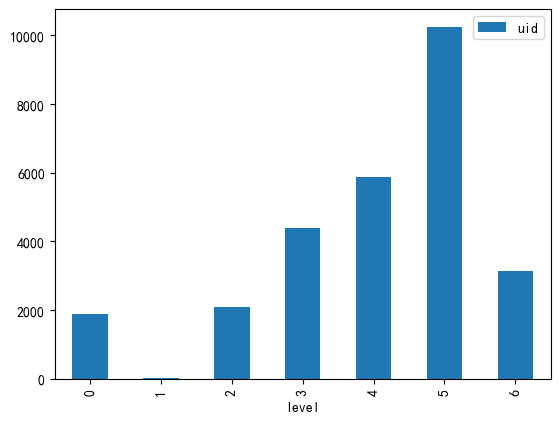

In [22]:
danmu_level.groupby('level')[['uid']].count().plot(kind='bar')

大部分弹幕主要来自于4、5级用户。自学课程大部分发弹幕的观众，都是B站的粘性用户

<Axes: xlabel='level'>

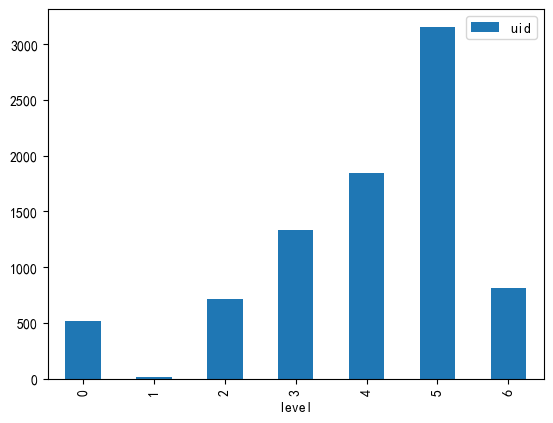

In [23]:
danmu_level.groupby('level')[['uid']].nunique().plot(kind='bar')

# 4.视频内容

## 4.1 视频内容处理

In [24]:
danmu

,id,progress,content,ctime,uid,视频标题,弹幕创建时间,年,月份,星期,小时,用户弹幕数
0,53766889040208384,2691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析.xlsx,2021-08-22 22:43:22,2021,8,7,22,2.0
1,53783364377004544,9193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:06,2021,8,1,7,79.0
2,53783376819848704,23017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:30,2021,8,1,7,79.0
3,53788075865425920,31033,好家伙 我直接好家伙,1629683812,-6460990597571269883,1、系统认识数据分析.xlsx,2021-08-23 09:56:52,2021,8,1,9,7.0
4,53811230195500032,68093,大制作,1629727976,8879111121911466217,1、系统认识数据分析.xlsx,2021-08-23 22:12:56,2021,8,1,22,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:10,2022,12,4,0,35.0
1250,1212573101313764864,4412898,5,1671641177,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:17,2022,12,4,0,35.0
1251,1214583153063240704,4407770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx,2022-12-24 19:19:54,2022,12,6,19,2.0
1252,1214583220188773888,4414000,5,1671880802,6689174160540423840,5、Python.xlsx,2022-12-24 19:20:02,2022,12,6,19,2.0


In [25]:
from time import strftime
from time import gmtime

In [26]:
danmu['progress'] = danmu['progress']/1000

In [27]:
danmu

,id,progress,content,ctime,uid,视频标题,弹幕创建时间,年,月份,星期,小时,用户弹幕数
0,53766889040208384,2.691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析.xlsx,2021-08-22 22:43:22,2021,8,7,22,2.0
1,53783364377004544,9.193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:06,2021,8,1,7,79.0
2,53783376819848704,23.017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:30,2021,8,1,7,79.0
3,53788075865425920,31.033,好家伙 我直接好家伙,1629683812,-6460990597571269883,1、系统认识数据分析.xlsx,2021-08-23 09:56:52,2021,8,1,9,7.0
4,53811230195500032,68.093,大制作,1629727976,8879111121911466217,1、系统认识数据分析.xlsx,2021-08-23 22:12:56,2021,8,1,22,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404.199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:10,2022,12,4,0,35.0
1250,1212573101313764864,4412.898,5,1671641177,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:17,2022,12,4,0,35.0
1251,1214583153063240704,4407.770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx,2022-12-24 19:19:54,2022,12,6,19,2.0
1252,1214583220188773888,4414.000,5,1671880802,6689174160540423840,5、Python.xlsx,2022-12-24 19:20:02,2022,12,6,19,2.0


In [28]:
danmu['视频进度'] = danmu['progress'].map(lambda x:strftime('%H:%M:%S',gmtime(x)))

In [29]:
danmu['视频进度【时分】'] = danmu['视频进度'].str[:5]
danmu

,id,progress,content,ctime,uid,视频标题,弹幕创建时间,年,月份,星期,小时,用户弹幕数,视频进度,视频进度【时分】
0,53766889040208384,2.691,这熟悉的bgm让人灵魂颤抖，向敌军进攻，冲啊！,1629643402,4658843910516903647,1、系统认识数据分析.xlsx,2021-08-22 22:43:22,2021,8,7,22,2.0,00:00:02,00:00
1,53783364377004544,9.193,DNA动了,1629674826,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:06,2021,8,1,7,79.0,00:00:09,00:00
2,53783376819848704,23.017,大制作啊,1629674850,-5089316151886879487,1、系统认识数据分析.xlsx,2021-08-23 07:27:30,2021,8,1,7,79.0,00:00:23,00:00
3,53788075865425920,31.033,好家伙 我直接好家伙,1629683812,-6460990597571269883,1、系统认识数据分析.xlsx,2021-08-23 09:56:52,2021,8,1,9,7.0,00:00:31,00:00
4,53811230195500032,68.093,大制作,1629727976,8879111121911466217,1、系统认识数据分析.xlsx,2021-08-23 22:12:56,2021,8,1,22,2.0,00:01:08,00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1212573043013250816,4404.199,终于毕业辣！,1671641170,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:10,2022,12,4,0,35.0,01:13:24,01:13
1250,1212573101313764864,4412.898,5,1671641177,-4078686192199890078,5、Python.xlsx,2022-12-22 00:46:17,2022,12,4,0,35.0,01:13:32,01:13
1251,1214583153063240704,4407.770,疯狂撒花！,1671880794,6689174160540423840,5、Python.xlsx,2022-12-24 19:19:54,2022,12,6,19,2.0,01:13:27,01:13
1252,1214583220188773888,4414.000,5,1671880802,6689174160540423840,5、Python.xlsx,2022-12-24 19:20:02,2022,12,6,19,2.0,01:13:34,01:13


## 4.2 视频内容分析

In [30]:
p1 = danmu[danmu['视频标题']=='1、系统认识数据分析.xlsx']

In [31]:
p1.groupby('视频进度【时分】')[['id']].count().sort_values('id',ascending=False)

,id
视频进度【时分】,
00:29,244
00:00,128
00:11,100
00:09,88
00:15,85
00:24,85
00:28,79
00:01,77
00:03,76


去掉开头结尾，11分钟有100条弹幕，但似乎并没有什么特殊的视频内容；9分钟，是因为PPT内有提问，大家在互动

In [32]:
p1[p1['视频进度【时分】']=='00:11']

,id,progress,content,ctime,uid,视频标题,弹幕创建时间,年,月份,星期,小时,用户弹幕数,视频进度,视频进度【时分】
467,54538390004170240,683.024,正在看的小伙伴举个手呀,1631114923,4287605311228341710,1、系统认识数据分析.xlsx,2021-09-08 23:28:43,2021,9,3,23,1.0,00:11:23,00:11
468,54614344568386048,695.103,举手,1631259795,-1628569071256015389,1、系统认识数据分析.xlsx,2021-09-10 15:43:15,2021,9,5,15,3.0,00:11:35,00:11
469,54655814497023488,702.582,1,1631338893,-1367667807228799785,1、系统认识数据分析.xlsx,2021-09-11 13:41:33,2021,9,6,13,1.0,00:11:42,00:11
470,54721008270816256,713.449,1,1631463240,-296757868499160289,1、系统认识数据分析.xlsx,2021-09-13 00:14:00,2021,9,1,0,1.0,00:11:53,00:11
480,55127660746605568,705.966,1,1632238868,-6542834790891478612,1、系统认识数据分析.xlsx,2021-09-21 23:41:08,2021,9,2,23,1.0,00:11:45,00:11
482,55160558195541504,693.326,举手,1632301615,7815453928319057398,1、系统认识数据分析.xlsx,2021-09-22 17:06:55,2021,9,3,17,2.0,00:11:33,00:11
483,55249734176776704,677.565,红红火火恍恍惚惚,1632471704,4911477121964877228,1、系统认识数据分析.xlsx,2021-09-24 16:21:44,2021,9,5,16,2.0,00:11:17,00:11
485,55324748334235136,697.368,我我我,1632614783,-2332941944077862983,1、系统认识数据分析.xlsx,2021-09-26 08:06:23,2021,9,7,8,6.0,00:11:37,00:11
486,55324751524026880,706.511,嘎嘎嘎,1632614789,-2332941944077862983,1、系统认识数据分析.xlsx,2021-09-26 08:06:29,2021,9,7,8,6.0,00:11:46,00:11
487,55375446866020352,708.501,哒啦啦~,1632711482,1428966444445166747,1、系统认识数据分析.xlsx,2021-09-27 10:58:02,2021,9,1,10,1.0,00:11:48,00:11


出现了节奏弹幕（在看的举手），诱发了弹幕激增

In [33]:
p2 = danmu[danmu['视频标题']=='2、EXCEL基础操作.xlsx']
p2.groupby('视频进度【时分】')[['id']].count().sort_values('id',ascending=False)

,id
视频进度【时分】,
03:07,1277
03:06,570
00:58,406
03:20,322
03:21,302
00:00,191
01:09,163
00:39,154
01:08,143


In [34]:
p3 = danmu[danmu['视频标题']=='3、Tableau数据可视化.xlsx']
p3.groupby('视频进度【时分】')[['id']].count().sort_values('id', ascending=False)

,id
视频进度【时分】,
02:48,189
00:57,177
02:47,177
01:15,79
00:00,75
00:58,73
00:05,62
01:42,58
00:59,58


In [35]:
p4 = danmu[danmu['视频标题']=='4、SQL从入门到实战.xlsx']
p4.groupby('视频进度【时分】')[['id']].count().sort_values('id', ascending=False)

,id
视频进度【时分】,
03:54,236
03:53,116
01:09,103
00:00,98
00:45,92
03:05,85
03:04,81
01:05,77
01:06,77


In [36]:
p4 = danmu[danmu['视频标题']=='5、Python.xlsx']
p4.groupby('视频进度【时分】')[['id']].count().sort_values('id', ascending=False)

,id
视频进度【时分】,
01:13,117
00:21,99
00:00,60
00:01,52
00:17,43
00:05,30
00:06,28
00:20,28
00:08,27


|1.|时序|
|:--|:--|
|现象|1、从月份角度看，3月份参与互动的用户积极度最高，也有可能3月得到了B站大量的曝光<br>2、从星期维度的角度看，大家每周的状态be like:周一都在忙着开会和工作，周二、三四都在狠狠の摸鱼！周五、六在疯狂爽玩，周天逐渐找回一点学习状态<br>3、从小时维度来看：自学2.0，发送弹幕的人，似乎能够分为2or3类不同的人群|

|2.|用户|
|:--|:--|
|结论|自学课程2.0主要的活跃用户都是由4、5级用户组成，师兄的粉丝有可能大部分都是B站的高度用户（当然有可能DY和B站都玩）<br>|
|备注|**1、如果师兄的粉丝和观众真的大部分都是B站的高度用户，那么能否去进一步评估站外引流的空间有多大、以及可行性<br>2、在此畅想猜测，B站的用户等级分布 是否也呈现两头窄、中间宽的情况？**|

|3.|内容|
|:--|:--|
|结论|1、优质的视频内容是一定能够得到大家的认可的<br>2、弹幕的氛围与活跃度，可以直观的衡量教学类内容的视频节奏、以及知识的传达情况|